In [ ]:
%pip install --upgrade tensorflow

In [ ]:
# %pip install -q tfds-nightly matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 41.6 MB/s eta 0:00:00


In [ ]:
%pip install padasip

# IMPORTING STUFF


In [6]:
import matplotlib.pyplot as plt
import PIL
import random
import numpy as np
import tensorflow as tf
import seaborn as sns
# import tensorflow_datasets as tfds

from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow import keras
from keras.optimizers import SGD
from keras import layers
# from sklearn.metrics import plot_confusion_matrix
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pathlib

drive_dataset_path = pathlib.Path("/content/drive/MyDrive/tcc/data5/")
local_dataset_path = pathlib.Path("C:/Users/saman/Documents/storage/data_gaf_5-2")

train_data_dir = pathlib.Path(local_dataset_path, "train")
test_data_dir = pathlib.Path(local_dataset_path, "test")

# data_dir = pathlib.Path("/content/drive/MyDrive/tcc/data-raw")

# image_count = len(list(train_data_dir.glob('*/*.png')))
# print(image_count)

In [4]:
batch_size = 32
img_height = 224
img_width = 224

In [5]:
AUTOTUNE = tf.data.AUTOTUNE
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 7414 files belonging to 2 classes.


In [ ]:
opt = SGD(learning_rate=0.001)

def cnn_standard_model():
  random.seed(42)
  return keras.models.Sequential([
    layers.Rescaling(1./255,  input_shape=(img_width, img_height, 3)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(2, name="outputs")
  ]).compile(optimizer=opt,
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])


In [ ]:
opt = SGD(learning_rate=0.001)

def cnn_vgg16_batch_norm_model():
    random.seed(42)
    return keras.models.Sequential([
        layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'),
        layers.Flatten(name='flatten'),
        layers.Dense(256, activation='relu', name='fc1'),
        layers.Dense(256, activation='relu', name='fc2'),
        layers.Dense(2, name='output')
    ]).compile(optimizer=opt,
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])


In [11]:
opt = SGD(learning_rate=0.001)

def cnn_vgg16_model():
    random.seed(42)
    cnn_model = keras.models.Sequential([
        layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
        layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'),
        layers.Flatten(name='flatten'),
        layers.Dense(4096, activation='relu', name='fc1'),
        layers.Dense(4096, activation='relu', name='fc2'),
        layers.Dense(1000, name='output')
    ])
    cnn_model.compile(optimizer=opt,
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])
    return cnn_model


In [ ]:
from keras import Model 

opt = SGD(learning_rate=0.001)
def resnet152():
  cnn_resnet_model = tf.keras.applications.resnet.ResNet152(
      include_top=False,
      weights='imagenet',
      input_shape=(224,224,3),
  )

  for layer in cnn_resnet_model.layers[:-15]:
    layer.trainable = False

  x = cnn_resnet_model.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Flatten()(x)
  x = layers.Dense(units=512, activation='relu')(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(units=512, activation='relu')(x)
  x = layers.Dropout(0.3)(x)
  output = Dense(2, name='output')(x)
  return (cnn_resnet_model.input, output).compile(optimizer=opt,
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

#set early stopping criteria
pat = 5 #this is the number of epochs with no improvment after which the training will stop
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

#define the model checkpoint callback -> this will keep on saving the model as a physical file
model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)

model_history = list()

test_history = list()

NUMBER_OF_FOLDS=3
for fold in range(NUMBER_OF_FOLDS):
  seed = np.random.randint(1,1000, 1)[0]

  print(f"Training on Fold: {fold + 1}")
  train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    subset = "training",
    validation_split=0.2,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
  )

  val_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    subset = "validation",
    validation_split=0.2,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
  )
  
  train_ds = train_ds.shuffle(1)
  val_ds = val_ds.shuffle(1)

  model = cnn_vgg16_model()
  
  results = model.fit(train_ds, validation_data=val_ds, epochs=120, batch_size=batch_size, callbacks=[early_stopping, model_checkpoint])

  model_history.append(results)

  print("======="*12, end="\n\n\n")

In [ ]:
#Load the model that was saved by ModelCheckpoint
model = load_model('fas_mnist_1.h5')

X = np.concatenate([x for x, _ in test_ds], axis=0)
y_true = np.concatenate([y for _, y in test_ds], axis=0)
model.evaluate(X, y_true)

27/27 [==============================] - 9s 220ms/step - loss: 0.7011 - accuracy: 0.5156


[0.7011234760284424, 0.5155875086784363]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia do Treino')
plt.plot(epochs_range, val_acc, label='Acurácia da Validação')
plt.legend(loc='lower right')
plt.title('Acurácia - Validação e Treino')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda do Treino')
plt.plot(epochs_range, val_loss, label='Perda da Validação')
plt.legend(loc='upper right')
plt.title('Perda - Validação e Treino')
plt.show()

NameError: ignored

In [ ]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, class_names)

In [ ]:
X = np.concatenate([x for x, _ in val_ds], axis=0)

In [ ]:
y_true = np.concatenate([y for _, y in val_ds], axis=0)

In [ ]:
y_pred = model.predict(X).argmax(axis=1)

27/27 [==============================] - 3s 128ms/step


In [ ]:
import csv

f = open('/content/drive/MyDrive/tcc/planilha_val_1p.csv', 'w', encoding='UTF8')

writer = csv.writer(f)

writer.writerow("pr")

for i in range(len(y_pred)):
  writer.writerow(f"{y_pred[i]}{y_true[i]}")


f.close()

In [ ]:
class_names

['apnea', 'normal']

<AxesSubplot:title={'center':'Matriz de confusão - Validação'}>

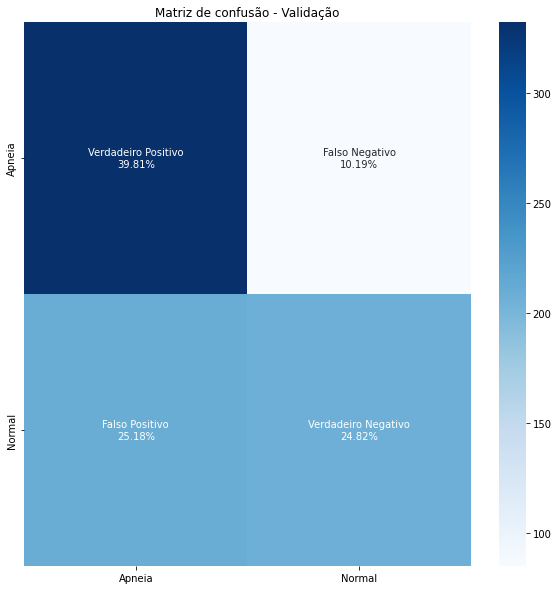

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true, y_pred)

# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%', cmap='Blues', xticklabels=["Apneia", "Normal"], yticklabels=["Apneia", "Normal"])


group_names = ["Verdadeiro Positivo",'Falso Negativo','Falso Positivo','Verdadeiro Negativo']

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

_, ax = plt.subplots(figsize=(10,10))

ax.set_title("Matriz de confusão - Validação")

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=["Apneia", "Normal"], yticklabels=["Apneia", "Normal"], ax=ax)

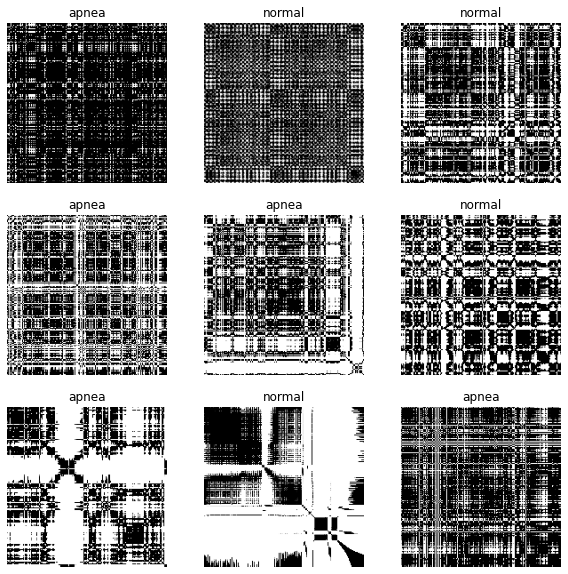

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, class_names)



In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1)
  ]
)

In [ ]:
from keras import layers
random.seed(42)

num_classes = len(class_names)
model = keras.models.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2,  activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 22, 22, 64)      

In [ ]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/saved_model/tcc_model_da_batch32_is128_e25_threshold0p25')

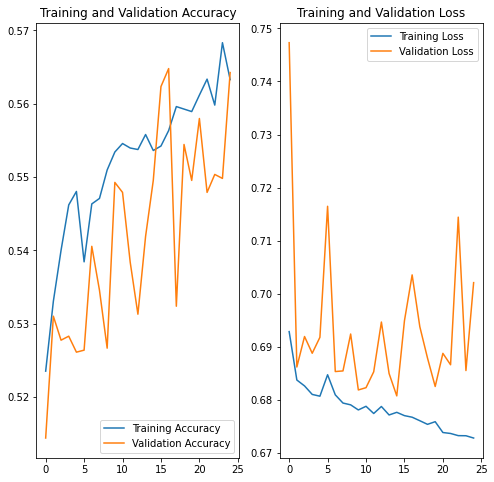

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X)
cm = confusion_matrix(y_true, predictions, labels=np.array(class_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(class_names))
disp.plot()

80/80 [==============================] - 13s 165ms/step


ValueError: ignored

In [ ]:
y_true.shape

(2548,)

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)

InvalidArgumentError: ignored